Data analysis of the movies industry dataset. In this analysis, a close look at a possible correlation between the different features of the dataset is examined. The dataset from kaggle.com

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots.

## Load the Dataset

movies industry dataframe as midf

In [2]:
midf = pd.read_csv('movies.csv')

In [3]:
midf.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
midf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


### Data Insight:

1 There are 15 columns (features) in the dataset and 6820 data entries.

2 Three columns are float data type.

3 Three columns are integer data type.

4 Nine columns are string (object) data type.

5 Zero null values i.e all the 6280 entires are non-null

## Statistical Insight

In [5]:
midf.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


### Data Insight:

1 Mean values

2 Standard Deviation

3 Minimum values

4 Maximum values

5 Quartiles (1st, 2nd and 3rd)

## Check for Missing Data

In [6]:
midf.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [7]:
for col in midf.columns:
    percentage_missing = np.mean(midf[col].isnull())
    print('{} - {}%'.format(col,percentage_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


### Data Insight:

No null values

# Data Cleaning

In [8]:
midf.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [9]:
midf['budget'] = midf['budget'].astype('int64')

midf['gross'] = midf['gross'].astype('int64')

# changing the data type of some columns

In [11]:
midf['year(corrected)'] = midf['released'].astype(str).str[:4]

# create correct year column

# the year of the release date should hypothetically be the same as the years in the year column

In [24]:
midf.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year(corrected)
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [28]:
midf2 = midf.sort_values(by=['budget'], inplace=False,ascending=False)
midf2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year(corrected)
4631,300000000,Walt Disney Pictures,USA,Gore Verbinski,Action,309420425,Pirates of the Caribbean: At World's End,PG-13,2007-05-25,169,7.1,Johnny Depp,514191,Ted Elliott,2007,2007
5293,260000000,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,2010
4637,258000000,Columbia Pictures,USA,Sam Raimi,Action,336530303,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,2007
6624,250000000,Marvel Studios,USA,Anthony Russo,Action,408084349,Captain America: Civil War,PG-13,2016-05-06,147,7.9,Chris Evans,442645,Christopher Markus,2016,2016
6194,250000000,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,2014


In [16]:
pd.set_option('display.max_rows', None)
# full display of dataset

### Check for duplicate entries

In [19]:
midf[midf.duplicated()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year(corrected)


In [22]:
midf['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
2742                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produ��es
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

### Data Insight:

No duplicate value

midf.drop_duplicates()- to remove duplicate values


# Correlation

check for relationship between features of the movie industry data

### scatter plot with budget vs gross

Text(0.5, 0, 'Budget for Film')

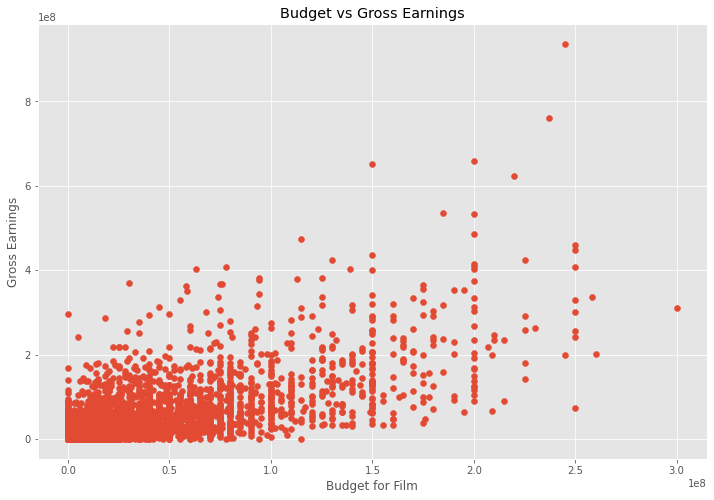

In [31]:
plt.scatter(x=midf['budget'], y=midf['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')

<AxesSubplot:xlabel='budget', ylabel='gross'>

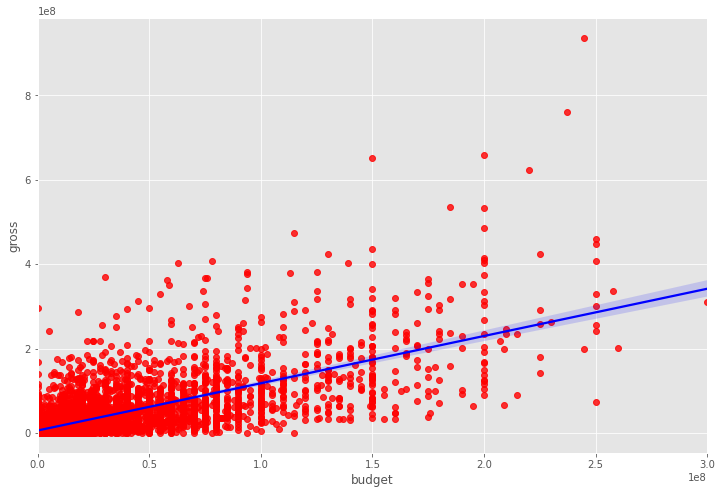

In [32]:
sns.regplot(x='budget', y='gross', data=midf, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
#plot budget vs gross using seaborn

### Data Insight:

There is a positive correlation between budget and gross.

In [33]:
midf.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


### Data insight:

High correlation between budget and gross

High correlation between votes and gross

### Visualize Correlation Matrix

[]

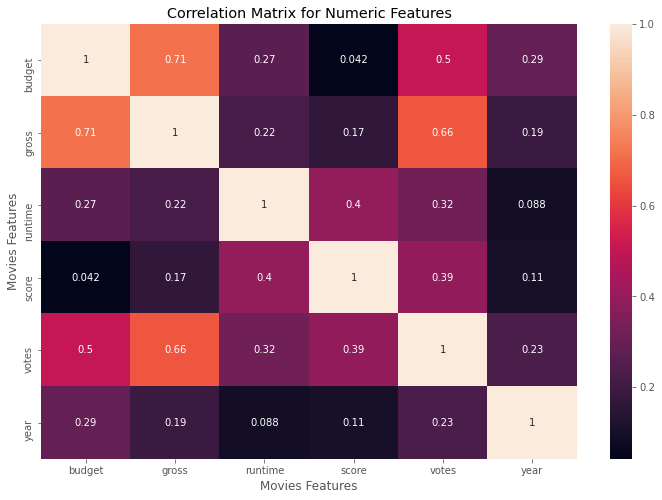

In [34]:
correlation_matrix = midf.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.plot()

### Data Insight:

bright colors are high correlation

dark colors are low correlation

In [37]:
# a look at all the features to determine the extent of the correlation

midf_numericalized = midf

for col in midf_numericalized.columns:
    if(midf_numericalized[col].dtype == 'object'):
        midf_numericalized[col] = midf_numericalized[col].astype('category')
        midf_numericalized[col] = midf_numericalized[col].cat.codes
midf_numericalized.head()

# converting object features to mumeric category

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year(corrected)
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


[]

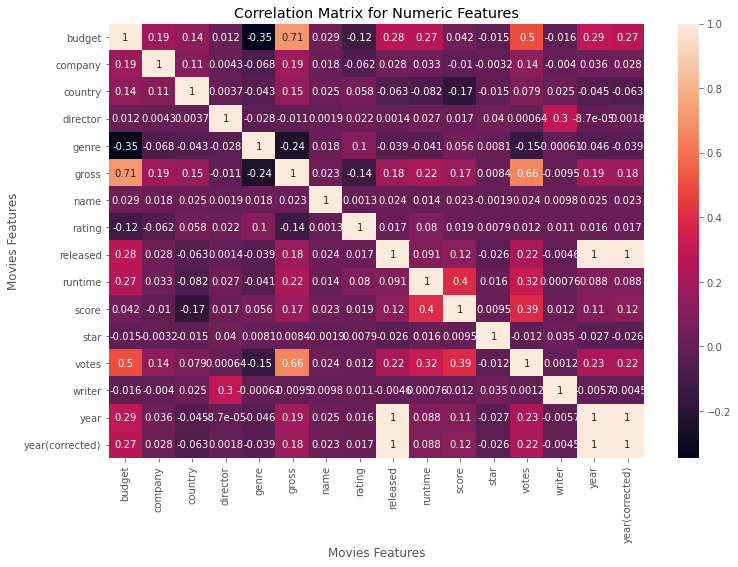

In [38]:
correlation_matrix = midf_numericalized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.plot()

### Data Insight:

There are a lot low and negative correlation between most features.

There is negative correlation between rating and gross, likewise between genre and gross.

gross has low correlation with most features such as company, star, year, score, writer, e.tc

In [40]:
midf_numericalized.corr()

# tabular representation of correlation

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year(corrected)
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [41]:
correlation_mat = midf_numericalized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget           budget             1.000000
                 company            0.187205
                 country            0.137635
                 director           0.011602
                 genre             -0.346794
                 gross              0.712196
                 name               0.028712
                 rating            -0.119660
                 released           0.276635
                 runtime            0.268226
                 score              0.042145
                 star              -0.015062
                 votes              0.503924
                 writer            -0.015611
                 year               0.291009
                 year(corrected)    0.274820
company          budget             0.187205
                 company            1.000000
                 country            0.107950
                 director           0.004320
                 genre             -0.068330
                 gross              0.187220
          

In [43]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre            budget            -0.346794
budget           genre             -0.346794
gross            genre             -0.242676
genre            gross             -0.242676
score            country           -0.174414
country          score             -0.174414
votes            genre             -0.150519
genre            votes             -0.150519
rating           gross             -0.135538
gross            rating            -0.135538
budget           rating            -0.119660
rating           budget            -0.119660
country          runtime           -0.081796
runtime          country           -0.081796
genre            company           -0.068330
company          genre             -0.068330
country          year(corrected)   -0.062707
year(corrected)  country           -0.062707
country          released          -0.062609
released         country           -0.062609
rating           company           -0.062250
company          rating            -0.062250
year      

In [45]:
high_correlation = sorted_pairs[(sorted_pairs)>0.5]
high_correlation

votes            budget             0.503924
budget           votes              0.503924
votes            gross              0.662457
gross            votes              0.662457
                 budget             0.712196
budget           gross              0.712196
released         year               0.996187
year             released           0.996187
year(corrected)  year               0.996229
year             year(corrected)    0.996229
year(corrected)  released           0.999389
released         year(corrected)    0.999389
budget           budget             1.000000
writer           writer             1.000000
votes            votes              1.000000
star             star               1.000000
score            score              1.000000
runtime          runtime            1.000000
released         released           1.000000
rating           rating             1.000000
name             name               1.000000
gross            gross              1.000000
genre     

### Data Insight:

#### Votes and Budgets have the highest correlation to Gross earnings.